# Lecture 4b: Statistical Distributions & Array Operations

---
## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Load seaborn's default theme and color palette

---
## 1. Normal Distribution

**Formula:** `sigma * np.random.randn(...) + mu`
- Generates random samples from normal distribution
- `mu` = mean, `sigma` = standard deviation

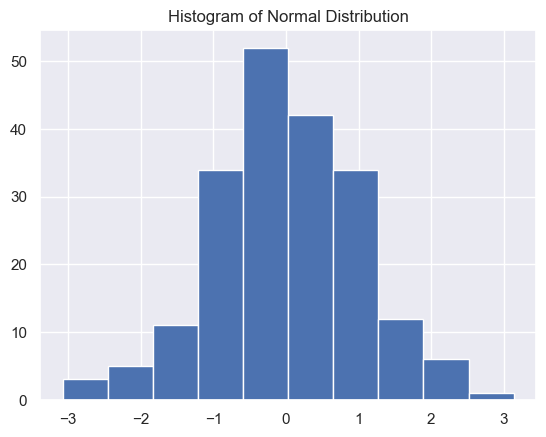

In [2]:
# Generate 200 random samples from standard normal distribution
x = np.random.randn(200, 1)

# Visualize with histogram
plt.hist(x)
plt.title('Histogram of Normal Distribution')
plt.show()

### Kernel Density Estimate (KDE) Plot

A method for visualizing distributions, analogous to histograms.
- Represents data using a **continuous probability density curve**
- Smoother than histograms

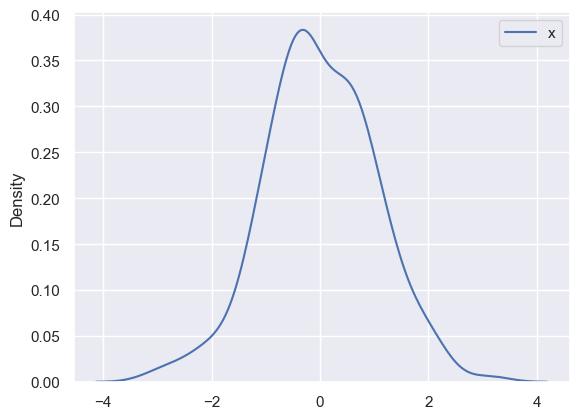

In [3]:
ax = sns.kdeplot(x, label='x')
ax.legend(loc="upper right")
plt.show()

---
## 2. Multivariate Normal Distribution

**Definition:** Generalization of 1D normal distribution to higher dimensions
- Also called: multinormal or Gaussian distribution
- Specified by **mean vector** and **covariance matrix**
- Covariance matrix describes correlations between variables

In [4]:
# Define parameters
mean = [0, 0]  # Mean values for two variables
covariance = [[5, 2], [2, 2]]  # Covariance matrix

# Generate 2000 samples
data = np.random.multivariate_normal(mean, covariance, size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

print(data.x)

0      -0.385386
1      -0.880455
2      -4.733134
3      -3.694216
4      -1.172842
          ...   
1995    0.168450
1996   -1.325570
1997   -0.469316
1998    2.627129
1999   -1.832536
Name: x, Length: 2000, dtype: float64


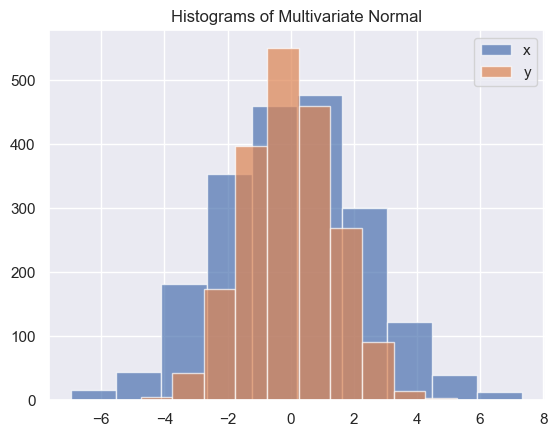

In [5]:
# Histogram for each variable
for col in 'xy':
    plt.hist(data[col], alpha=0.7, label=col)
plt.legend()
plt.title('Histograms of Multivariate Normal')
plt.show()

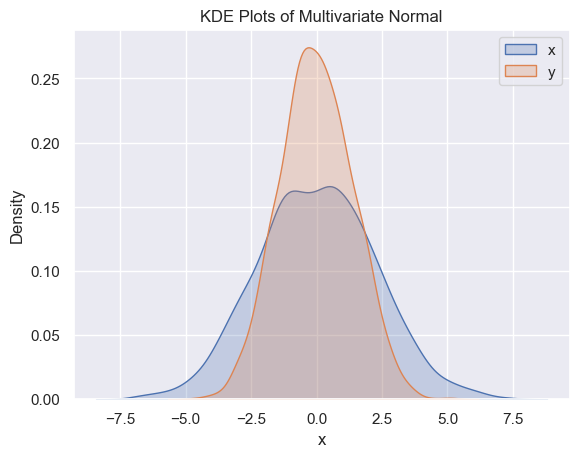

In [6]:
# KDE plot for each variable
for col in 'xy':
    sns.kdeplot(data[col], fill=True, label=col)
plt.legend()
plt.title('KDE Plots of Multivariate Normal')
plt.show()

---
## 3. Binary Search with `np.searchsorted()`

**Purpose:** Find indices where values should be inserted to maintain sorted order
- Efficient for sorted arrays
- Returns insertion indices

### Basic Usage

In [7]:
arr = np.array([1, 2, 4, 8, 9])
value = 5
index = np.searchsorted(arr, value)

print(f"Insert {value} at index {index}")  # Output: 3
print(f"Result: {np.insert(arr, index, value)}")

Insert 5 at index 3
Result: [1 2 4 5 8 9]


### Multiple Values

In [8]:
arr = np.array([1, 2, 4, 8, 9])
values = np.array([3, 5, 6, 7])
indices = np.searchsorted(arr, values)

print(f"Values: {values}")
print(f"Insertion indices: {indices}")

Values: [3 5 6 7]
Insertion indices: [2 3 3 3]


### Left vs Right Side (Handling Duplicates)

- `side='left'`: Returns index of **first occurrence**
- `side='right'`: Returns index **after last occurrence**

In [9]:
arr = np.array([1, 3, 5, 5, 5, 7, 9])
value = 5

index_left = np.searchsorted(arr, value, side='left')
index_right = np.searchsorted(arr, value, side='right')

print(f"Array: {arr}")
print(f"Value: {value}")
print(f"Left index (first occurrence): {index_left}")  # Output: 2
print(f"Right index (after last): {index_right}")      # Output: 5

Array: [1 3 5 5 5 7 9]
Value: 5
Left index (first occurrence): 2
Right index (after last): 5
